# Chi-Squared Distribution
#### by Elizabeth Barnes

So far we have mainly dealt with the normal distribution, however, there are a lot of other distributions out there! So, in this example we will work through an example to see how these other distributions can tell us about the statistical behaviour of our data.

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import importlib

#.............................................
# PLOTTING COMMANDS 
#.............................................
import matplotlib as mpl

# set figure defaults
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 8.0/2)

# Chi-Squared Distribution

Let's start out my making a "bucket" of a RV that is distributed according to a standard normal.

In [2]:
sigmaNormal = 1.
meanNormal = 0.

B = np.random.normal(loc = meanNormal, scale = sigmaNormal, size = 100000)       

Now, we will draw samples of length $nSample=25$ and calculate a funny statistic, which we will call $\chi^2$. $\chi^2$ is the ratio of the sample variance to the true variance of $B$, with a factor associated with $nSample$ thrown in. We will discuss why we do this in a few steps.

In [3]:
nSample = 25

x2 = []
for i in np.arange(0,10000):
    sample = np.random.choice(B, size = nSample, replace = True)
    x2 = np.append(x2,(nSample-1)*(np.std(sample))**2/sigmaNormal**2)

Ok - now we have 10,000 values of x2. Let's plot their histogram and see what they look like! (I like to guess what the plot will look like before making it. For example, I see that $\chi^2$ cannot be negative, so odds are it also has a long tail to the right...)

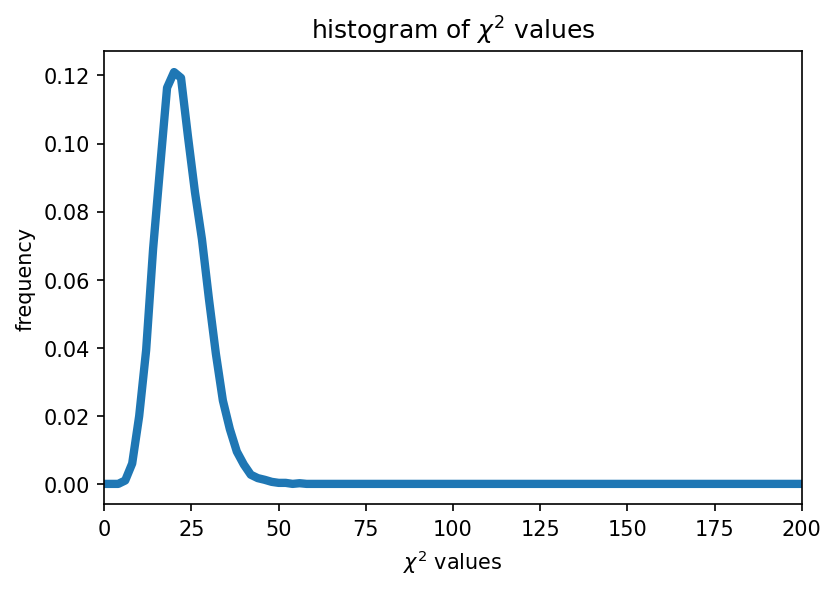

In [4]:
xbins = np.arange(0,1000,2)
hx = np.histogram(x2,xbins)
plt.plot(xbins[:-1],hx[0]/len(x2), linewidth=4)
plt.title('histogram of $\chi^2$ values')
plt.xlabel('$\chi^2$ values')
plt.ylabel('frequency')
plt.xlim(0,200)
plt.show()

Well, there it is. Indeed, the $\chi^2$ values never went negative and have a long tail to the right. So, why do we care about this? Well, this is the curve of the ratio of a sample variance to the _true_ variance of the data "bucket" the sample was drawn from. This is useful! 

It turns out that this distribution is known analytically, and is the _Chi-Squared Distribution_, as I will convince you of below.

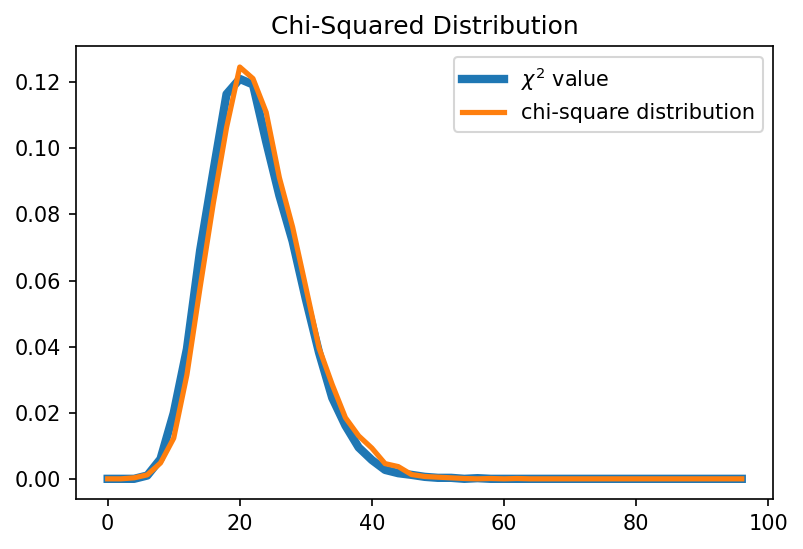

In [5]:
xbins = np.arange(0,100,2)
hx = np.histogram(x2,xbins)

chiSquare = np.random.chisquare(nSample-1,10000)
hcS = np.histogram(chiSquare,xbins)

plt.plot(xbins[:-1],hx[0]/len(x2),linewidth=4,label='$\chi^2$ value')
plt.plot(xbins[:-1],hcS[0]/len(chiSquare),linewidth=2.5, label='chi-square distribution')
plt.title('Chi-Squared Distribution')
plt.legend()
plt.show()

### New example

So, let's code a little example of how this might actually be useful. Let's imagine we went out into the field and took some measurements

In [6]:
nSample = 45
muSample = 0.
stdSample = 1.5

So, I'm wondering whether the variance of my sample (of my measurements) is different from what it "used to be". Say, once upon a time we knew that the population variance was $\sigma^2 = 2.$, that is, the population standard deviation was $\sigma = \sqrt{2.} = 1.41$. 

In [7]:
stdPop = np.sqrt(2.)

If we also assume that the data I am sampling followed (and still follows) a normal distribution we can use the $\chi$-Squared distribution! First, we calculate our test statistic, $\chi^2$.

In [8]:
x2Sample = (nSample-1)*(stdSample**2)/(stdPop**2)
print('chi-square statistic = ' + str(np.round(x2Sample,2)))

chi-square statistic = 49.5


Is this value big? Small? I have no idea. But what I can do is get a feeling for its size by comparing it to what I might expect under the null hypothesis that nothing has changed.

Before we do that though, just to convince ourselves that the chi-squared distribution is indeed what we want. Let's also compute the expected distribution of the $\chi^2$ values from a dataset drawn from the population distribution.

In [9]:
B = np.random.normal(loc = muSample, scale = stdPop, size = 100000)       
x2 = []
for i in np.arange(0,10000):
    sample = np.random.choice(B, size = nSample, replace = True)
    x2 = np.append(x2,(nSample-1)*(np.std(sample)**2)/(stdPop**2))

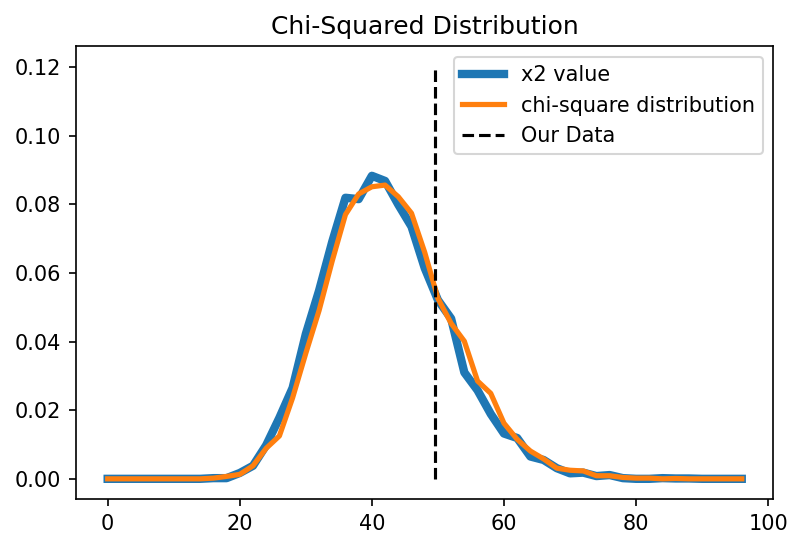

In [10]:
xbins = np.arange(0,100,2)
hx = np.histogram(x2,xbins)

chiSquare = np.random.chisquare(nSample-1,10000)
hcS = np.histogram(chiSquare,xbins)

plt.plot(xbins[:-1],hx[0]/len(x2),linewidth=4,label='x2 value')
plt.plot(xbins[:-1],hcS[0]/len(chiSquare),linewidth=2.5, label='chi-square distribution')

plt.plot((x2Sample,x2Sample),(0,.12),'--k',label='Our Data')

plt.title('Chi-Squared Distribution')
plt.legend()
plt.show()

First, note that the orange and blue line up! That is, we didn't have to compute the $\chi^2$ values ourselves, as the chi-square distribution is indeed what we want. Yay for only one line of code!

Now to the results. By looking at how likely it is to get our test statistic or more extreme, we can assess whether we think the variance has changed. By eye, this particular measurement doesn't seem too terribly extreme to me (i.e. very easily could have come from the original population distribution).

# F-statistic/distribution

While the Chi-Squared distribution is good for assessing the ratio of a sample variance to the true variance, the f-statistic is used to assess the ratio between two sample standard deviations $s_1$ and $s_2$. Imagine that we have the null hypothesis that two data sets have the same underlying population variance...

Step 1, I'm going to create two buckets of normally distributed data.

In [11]:
sigmaNormal1 = 1.
meanNormal1 = 0.

sigmaNormal2 = 1
meanNormal2 = 0.

B1 = np.random.normal(loc = meanNormal1, scale = sigmaNormal1, size = 100000)       
B2 = np.random.normal(loc = meanNormal2, scale = sigmaNormal2, size = 100000)       

Step 2, let's draw samples from B1 and B2 of different sizes and calculated another weird statistic - this one we will call $F$. Let's do that a lot of times.

In [12]:
nSample1 = 50
nSample2 = 25

F = []
for i in np.arange(0,10000):
    sample1 = np.random.choice(B1, size = nSample1, replace = True)
    sample2 = np.random.choice(B2, size = nSample2, replace = True)
    
    s1 = np.var(sample1)
    s2 = np.var(sample2)    
    F = np.append(F,s1/s2)

As before, let's look at the distribution of $F$.

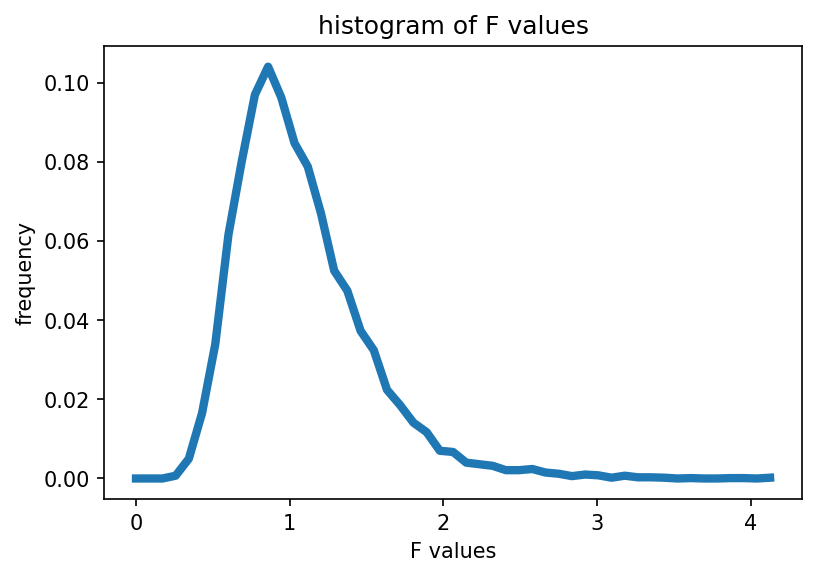

In [13]:
xbins = np.linspace(0,np.max(F),50)
hx = np.histogram(F,xbins)

plt.plot(xbins[:-1],hx[0]/len(x2), linewidth=4)
plt.title('histogram of F values')
plt.xlabel('F values')
plt.ylabel('frequency')
plt.show()

It turns out that this distribution is known analytically too. It is the _F-Distribution_, as I will convince you of below.

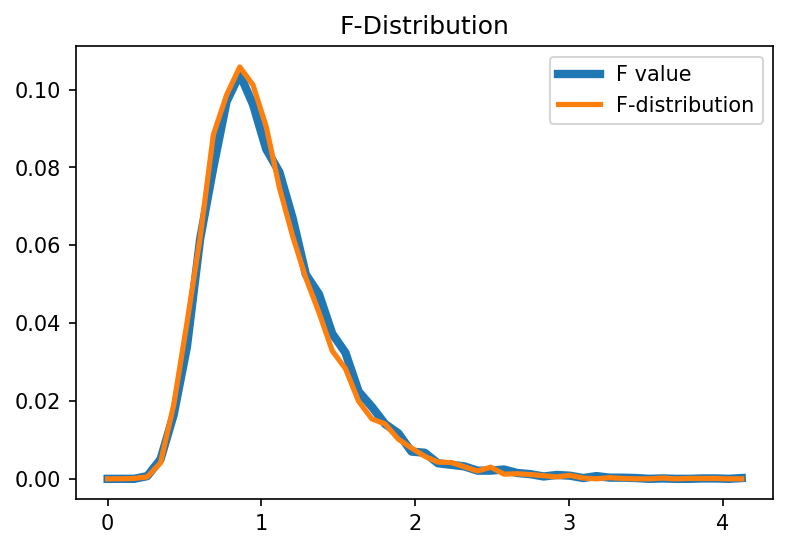

In [14]:
xbins = np.linspace(0,np.max(F),50)
hx = np.histogram(F,xbins)

dfNum = nSample1-1
dfDen = nSample2-1

FDist = np.random.f(dfNum,dfDen,10000)
hF = np.histogram(FDist,xbins)

plt.plot(xbins[:-1],hx[0]/len(F),linewidth=4,label='F value')
plt.plot(xbins[:-1],hF[0]/len(FDist),linewidth=2.5, label='F-distribution')
plt.title('F-Distribution')
plt.legend()
plt.show()

# Why is this useful? Here's why!

Say I collect two samples of data of unequal length. I go and calculate the variances of each of these samples, and they are different! The question is, are the differences in variance interesting?

In [15]:
#sample 1
nSample1 = 50
s1 = 6

#sample 2
nSample2 = 25
s2 = 4

I want to test if these two variances are statistically different from one another. Thus, my null hypothesis is that they came from the same underlying normal distribution - i.e. with the same variance!

I will calculate the F-statistic from my data.

In [16]:
F = s1**2/s2**2
print(F)

2.25


So, my first sample has 2.25 times the variance of my second sample. Is this a big enough difference to be possilby interesting? The F-statistic will tell me what to expect if my null hypothesis was true.

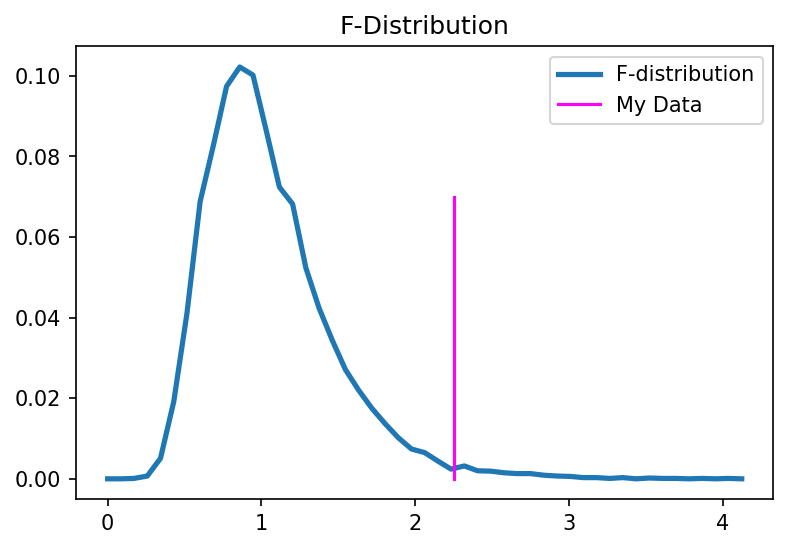

In [17]:
dfNum = nSample1-1
dfDen = nSample2-1

FDist = np.random.f(dfNum,dfDen,10000)
hF = np.histogram(FDist,xbins)

plt.plot(xbins[:-1],hF[0]/len(FDist),linewidth=2.5, label='F-distribution')

plt.plot((F,F),(0,.07),'-',color='fuchsia',label='My Data')

plt.title('F-Distribution')
plt.legend()
plt.show()

What is the probability of getting an F of 2 _or higher_ under the null that the two samples came from populations with equal variance?

In [18]:
1-stats.f.cdf(F,dfNum,dfDen)

0.016945600760738477

So, 1.7% chance. Hmmm, not terribly likely. This can now inform my next steps in thinking about why the variances could be different.

*To see any updated versions of this notebook, visit https://github.com/sjbothwell/ats655-coursematerial/blob/master/jupyter_notebooks/chisquared_distribution.ipynb*